In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [93]:
df = pd.read_csv("test_2008.csv")
df.head()

,id,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,HUSPNISH,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,...,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT
0,0,11,2008,1,201,0,2,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
1,1,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
2,2,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
3,3,11,2008,2,1,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
4,4,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0


In [94]:
# remove unnecessary features

new_df = df.copy()

# for feature in df.columns.values:
#     temp = new_df[feature]
#     elem0 = temp[0]
#     if np.count_nonzero(temp-elem0) == 0:
#         new_df = new_df.drop(feature, 1)
# new_df = new_df.drop('id', 1)

In [95]:
new_df.head()

,id,HRMONTH,HRYEAR4,HURESPLI,HUFINAL,HUSPNISH,HETENURE,HEHOUSUT,HETELHHD,HETELAVL,...,PEDISPHY,PEDISDRS,PEDISOUT,PRDISFLG,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT
0,0,11,2008,1,201,0,2,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
1,1,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
2,2,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
3,3,11,2008,2,1,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0
4,4,11,2008,1,201,0,1,1,1,-1,...,2,2,2,2,0,0,0,0,0,0


In [96]:
print new_df.shape

(16000, 382)


In [91]:
x = new_df.loc[:, new_df.columns != 'target'].values
y = new_df['target'].values

print x.shape
print y.shape


(64667, 382)
(64667,)


In [92]:
np.save("x_new.npy", x)
np.save("y_new.npy", y)

In [97]:
# test save file

x = new_df.values
print x.shape

(16000, 382)


In [98]:
np.save("x_new_test.npy", x)

# yeah u kno

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

x = np.load("x.npy")
y = np.load("y.npy")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
x_train.shape

(43326, 366)

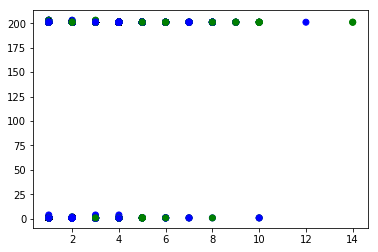

(43326, 2)

In [24]:
from sklearn.decomposition import PCA


colors = []
for i, _ in enumerate(x_train):
    if y_train[i] == 0:
        colors.append('b')
    else:
        colors.append('g')
    
    
plt.scatter(x_train[:, 0], x_train[:, 1], c=colors)
plt.show()

pca_model = PCA(n_components=2)
pca_model.fit(x_train)
embeddings = pca_model.transform(x_train)
embeddings.shape


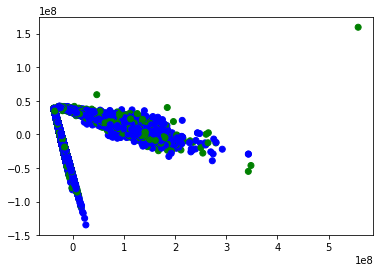

In [25]:
colors = []
for i, _ in enumerate(embeddings):
    if y_train[i] == 0:
        colors.append('b')
    else:
        colors.append('g')
    

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colors)
plt.show()

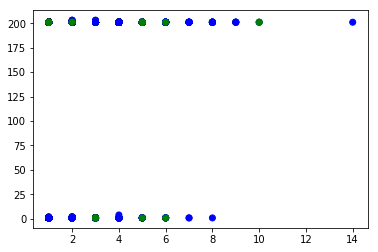

(21341, 2)


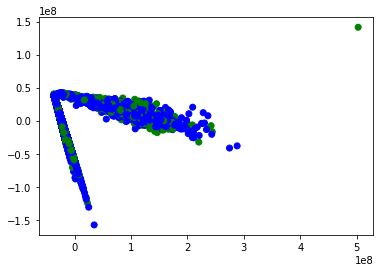

In [26]:
colors = []
for i, _ in enumerate(x_test):
    if y_train[i] == 0:
        colors.append('b')
    else:
        colors.append('g')

plt.scatter(x_test[:, 0], x_test[:, 1], c=colors)
plt.show()


embeddings = pca_model.transform(x_test)
print embeddings.shape

colors = []
for i, _ in enumerate(embeddings):
    if y_train[i] == 0:
        colors.append('b')
    else:
        colors.append('g')

plt.scatter(embeddings[:, 0], embeddings[:, 1], c = colors)
plt.show()

# random forest

In [194]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pickle

x = np.load("x_new.npy")
y = np.load("y_new.npy")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [195]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=25, random_state=0, verbose=True)
model.fit(x_train, y_train)
prob_preds = model.predict_proba(x_train)
performance = roc_auc_score(y_train, prob_preds[:, 1])
print performance

0.7821074634945534


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [196]:
prob_preds = model.predict_proba(x_test)
performance = roc_auc_score(y_test, prob_preds[:, 1])
print performance

0.7564487564835184


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [188]:
pickle.dump(model, open('models/first_test.pkl', 'wb'))

In [193]:
hehe = load_model("models/first_test.pkl")


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=True,
            warm_start=False)

# other

In [167]:
# pca -> random forest classifier
pca_model = PCA(n_components=150)
pca_model.fit(x_train)
embeddings_train = pca_model.transform(x_train)
embeddings_test = pca_model.transform(x_test)
model = RandomForestClassifier(max_depth=10, min_samples_leaf=50, random_state=0, verbose=True)
model.fit(embeddings_train, y_train)
prob_preds = model.predict_proba(embeddings_train)
performance = roc_auc_score(y_train, prob_preds[:, 1])
print performance

prob_preds = model.predict_proba(embeddings_test)
performance = roc_auc_score(y_test, prob_preds[:, 1])
print performance

0.8018301227547491
0.7442135151569653


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [200]:
from sklearn.ensemble import ExtraTreesClassifier


x = np.load("x_new.npy")
y = np.load("y_new.npy")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = ExtraTreesClassifier(max_depth=15, min_samples_leaf=25, random_state=0, verbose=True)
model.fit(x_train, y_train)
prob_preds = model.predict_proba(x_train)
performance = roc_auc_score(y_train, prob_preds[:, 1])
print performance


prob_preds = model.predict_proba(x_test)
performance = roc_auc_score(y_test, prob_preds[:, 1])
print performance

0.7921716821818551
0.7563091069965076


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# hyperparameter search

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle

x = np.load("data/x_normalized.npy")
y = np.load("data/y.npy")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


max_depth_param = [int(x) for x in np.linspace(10, 40, num = 10)]
min_samples_split_params = [2, 5, 10]
min_samples_leaf_params = [1, 2, 4]

best_train = 0.0
best_test = 0.0

best_train_depth = 0.0
best_train_min_samples_split = 0.0
best_train_min_samples_leaf = 0.0

best_test_depth = 0.0
best_test_min_samples_split = 0.0
best_test_min_samples_leaf = 0.0

for depth in max_depth_param:
    for min_samples_split in min_samples_split_params:
        for min_samples_leaf in min_samples_leaf_params:
            model = RandomForestClassifier(max_depth=depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0, verbose=False)
            model.fit(x_train, y_train)
            preds = model.predict_proba(x_train)[:, 1]
            
            train_performance = roc_auc_score(y_train, preds)
            print "TRAIN: " + str(train_performance)
            
            if train_performance > best_train:
                best_train = train_performance
                best_train_depth = depth
                best_train_min_samples_split = min_samples_split
                best_train_min_samples_leaf = min_samples_leaf
                
                
            preds = model.predict_proba(x_test)[:, 1]
            test_performance = roc_auc_score(y_test, preds)
            
            print "TEST: " + str(test_performance)
            
            if test_performance > best_test:
                best_test = test_performance
                best_test_depth = depth
                best_test_min_samples_split = min_samples_split
                best_test_min_samples_leaf = min_samples_leaf         
            

print "-------------"
print "BEST TRAIN MODEL"
print "max_depth: " + str(best_train_depth) + ", min_samples_split: " + str(best_train_min_samples_split) + ",min_samples_leaf: " + str(best_train_min_samples_leaf)

print "-------------"
print "BEST TEST MODEL"
print "max_depth: " + str(best_test_depth) + ", min_samples_split: " + str(best_test_min_samples_split) + ",min_samples_leaf: " + str(best_test_min_samples_leaf)


TRAIN: 0.809625139342064
TEST: 0.7614336790412715
TRAIN: 0.8105628782796382
TEST: 0.7627794859477615
TRAIN: 0.8037367548565272
TEST: 0.7626232990969131
TRAIN: 0.8102351829053904
TEST: 0.7604232769907551
TRAIN: 0.808588077189656
TEST: 0.7616801623918251
TRAIN: 0.8037367548565272
TEST: 0.7626232990969131
TRAIN: 0.8071557431182328
TEST: 0.7599044353971904
TRAIN: 0.8080502945415238
TEST: 0.7641266053487965
TRAIN: 0.8031265646913957
TEST: 0.76103644631727
TRAIN: 0.868895567253763
TEST: 0.7596520458211846
TRAIN: 0.8627138256691071
TEST: 0.7599795288350834
TRAIN: 0.851230837860092
TEST: 0.7614494602256809
TRAIN: 0.8645096082449106
TEST: 0.7610926960834818
TRAIN: 0.8620987563204121
TEST: 0.7623695657764922
TRAIN: 0.851230837860092
TEST: 0.7614494602256809
TRAIN: 0.850819852982515
TEST: 0.7605433389917473
TRAIN: 0.8515075226935362
TEST: 0.7584249884211419
TRAIN: 0.850500080009165
TEST: 0.7623253315853407
TRAIN: 0.927318342545102
TEST: 0.7529596517614473
TRAIN: 0.9161262215723309
TEST: 0.7526059

In [3]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=0, verbose=False)
model.fit(x_train, y_train)
preds = model.predict_proba(x_test)[:, 1]
test_performance = roc_auc_score(y_test, preds)

print "TEST: " + str(test_performance)

TEST: 0.7641266053487965


In [10]:
x = np.load("data/x_normalized.npy")
y = np.load("data/y.npy")
model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=0, verbose=False)
model.fit(x, y)
save_model("hehe/best_random_forest")

# utilities

In [142]:
# trying to range random forest over different hyperparameters
def generate_csv(model, x_data, name):
    ids = [i for i, _ in enumerate(x_data)]
    ids = np.array(ids)
    
    predictions = model.predict_proba(x_data)[:, 1]
    
    df = pd.DataFrame()
    df['id'] = ids
    df['target'] = predictions
    df.to_csv(name + ".csv", index=False)

    print df.head()

    
x_test = np.load("x_new_test.npy")
generate_csv(model, x_test, "submissions/second_test")

   id    target
0   0  0.503781
1   1  0.181107
2   2  0.164915
3   3  0.363230
4   4  0.279869


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [5]:
def load_model(filename):
    with open(filename, 'rb') as f:
        clf = pickle.load(f)
        return clf

def save_model(filename):
    pickle.dump(model, open(filename + ".pkl", 'wb'))